In [1153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score ,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')

In [1154]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Sleep_health_and_lifestyle_dataset.csv")

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Quality of sleep is on a scale of 1-10
Sleep duration- hours
Physical Activity Level - the amount of minutes someone engages in a physical activity in a day
Stress level - on a scale of 1-10
Heart Rate in Bpm

In [1155]:
df.shape

(374, 13)

In [1156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Cleaning of Data

In [1157]:
df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [1158]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')
display(df['Sleep Disorder'].unique())
#Weve filled the null values

array(['No Disorder', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [1159]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [1160]:
df['BMI Category'] = df['BMI Category'].replace('Normal', 'Normal Weight')
display(df['BMI Category'].unique())

array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

In [1161]:
df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [1162]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [1163]:
#In terms of blood pressure someone is classified according to the highest applicable category


df['Systolic'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))

def classify_bp(row):
    if row['Systolic'] < 120 and row['Diastolic'] < 80 :
        return 'Normal'
    elif row['Systolic'] <= 129 and row["Diastolic"] <= 80:
        return 'Elevated'
    elif row['Systolic'] >= 130 or row['Diastolic'] > 80:
        return 'Hypertension Stage 1'
    elif row['Systolic'] >= 140 or row['Diastolic'] >= 90:
        return 'Hypertension Stage 2'
    else:
        return 'Error'

df['Blood Pressure Status'] = df.apply(classify_bp, axis=1)

display(df[['Blood Pressure', 'Systolic', 'Diastolic', 'Blood Pressure Status']].head(5))

,Blood Pressure,Systolic,Diastolic,Blood Pressure Status
0,126/83,126,83,Hypertension Stage 1
1,125/80,125,80,Elevated
2,125/80,125,80,Elevated
3,140/90,140,90,Hypertension Stage 1
4,140/90,140,90,Hypertension Stage 1


In [1164]:
df["Blood Pressure Status"].unique()

array(['Hypertension Stage 1', 'Elevated', 'Normal'], dtype=object)

In [1165]:
df["Blood Pressure Status"].value_counts()

,count
Blood Pressure Status,
Hypertension Stage 1,221
Elevated,112
Normal,41


In [1166]:
df = df.drop('Systolic', axis=1)
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Diastolic,Blood Pressure Status
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,83,Hypertension Stage 1
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,80,Elevated
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,80,Elevated
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,90,Hypertension Stage 1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,90,Hypertension Stage 1


In [1167]:
df = df.drop('Diastolic', axis=1)
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,Hypertension Stage 1
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1


In [1168]:
df = df.drop('Blood Pressure', axis=1)
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,Hypertension Stage 1
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No Disorder,Elevated
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No Disorder,Elevated
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hypertension Stage 1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hypertension Stage 1


In [1169]:
df = df.drop('Person ID', axis=1)
display(df.head())

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No Disorder,Elevated
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No Disorder,Elevated
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hypertension Stage 1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hypertension Stage 1


Distribution of categorical columns

In [1170]:
df["Gender"].value_counts()

,count
Gender,
Male,189
Female,185


In [1171]:
df["Occupation"].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [1172]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal Weight,216
Overweight,148
Obese,10


In [1173]:
df["Sleep Disorder"].value_counts()

,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,78
Insomnia,77


In [1174]:
df["Blood Pressure Status"].value_counts()

,count
Blood Pressure Status,
Hypertension Stage 1,221
Elevated,112
Normal,41


Distribution of various numerical columns

<Axes: title={'center': 'Boxplot'}, ylabel='Age'>

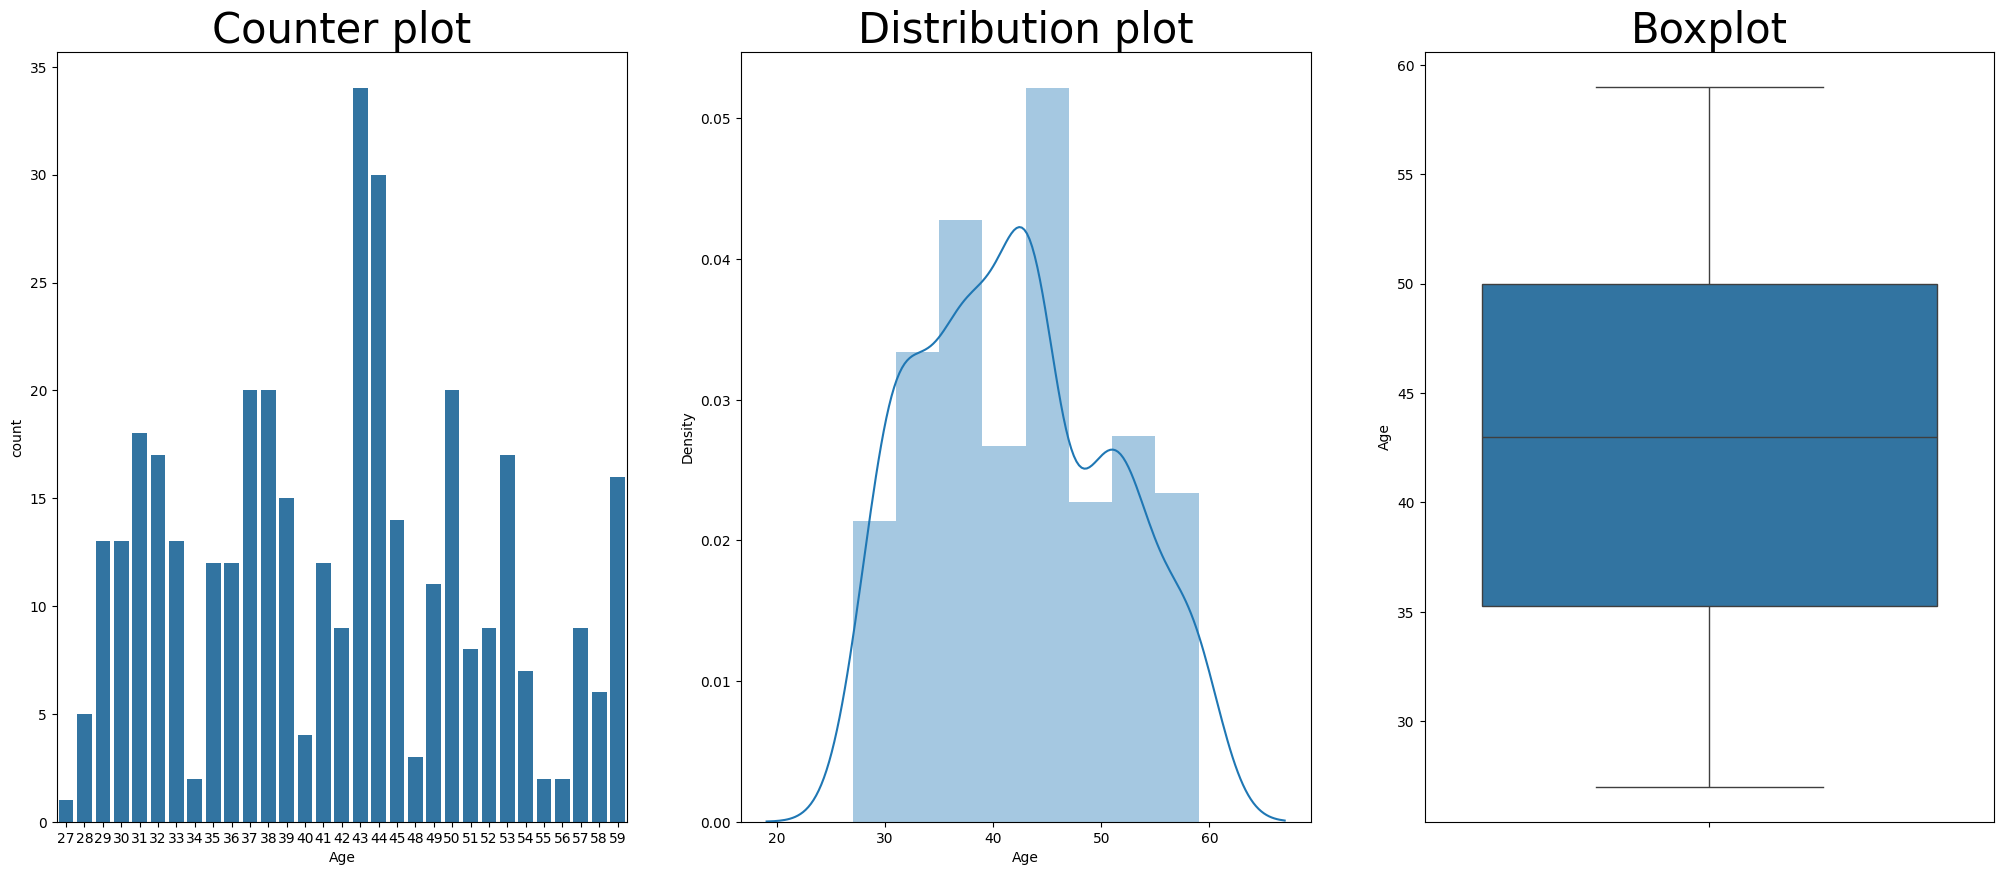

In [1175]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Age',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df.Age)
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df.Age)

<Axes: title={'center': 'Boxplot'}, ylabel='Stress Level'>

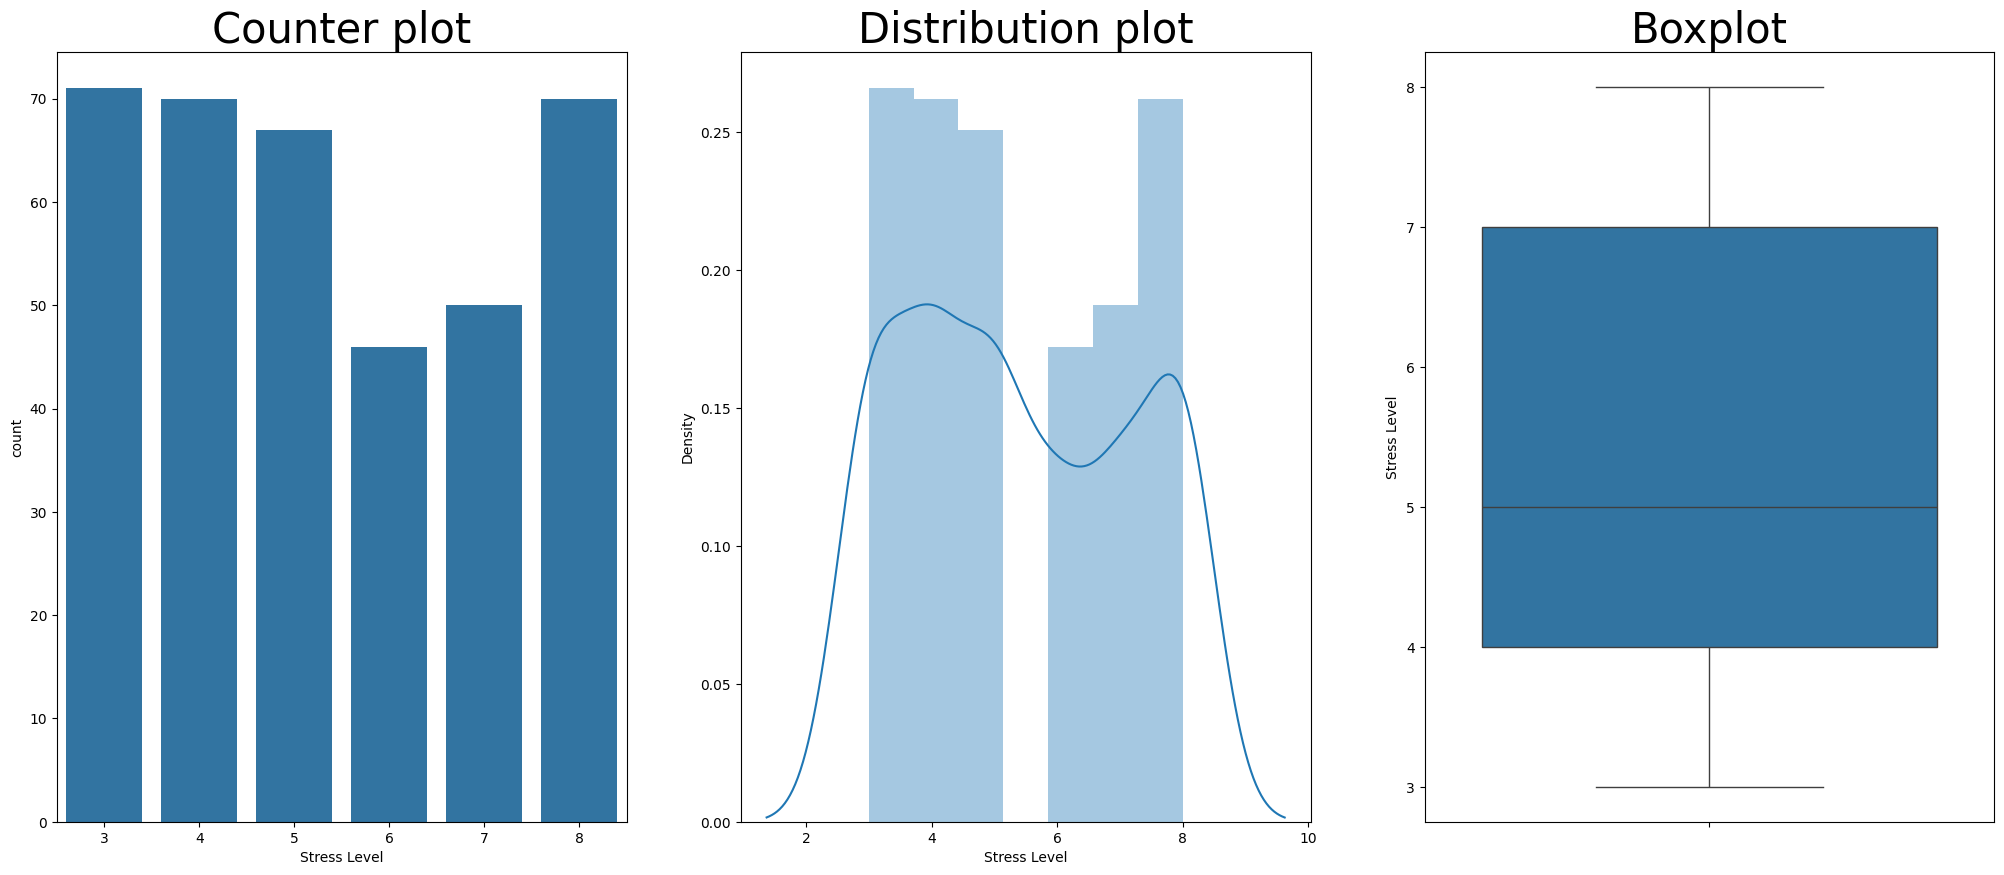

In [1176]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Stress Level',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Stress Level"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Stress Level"])

Quality of Sleep

<Axes: title={'center': 'Boxplot'}, ylabel='Quality of Sleep'>

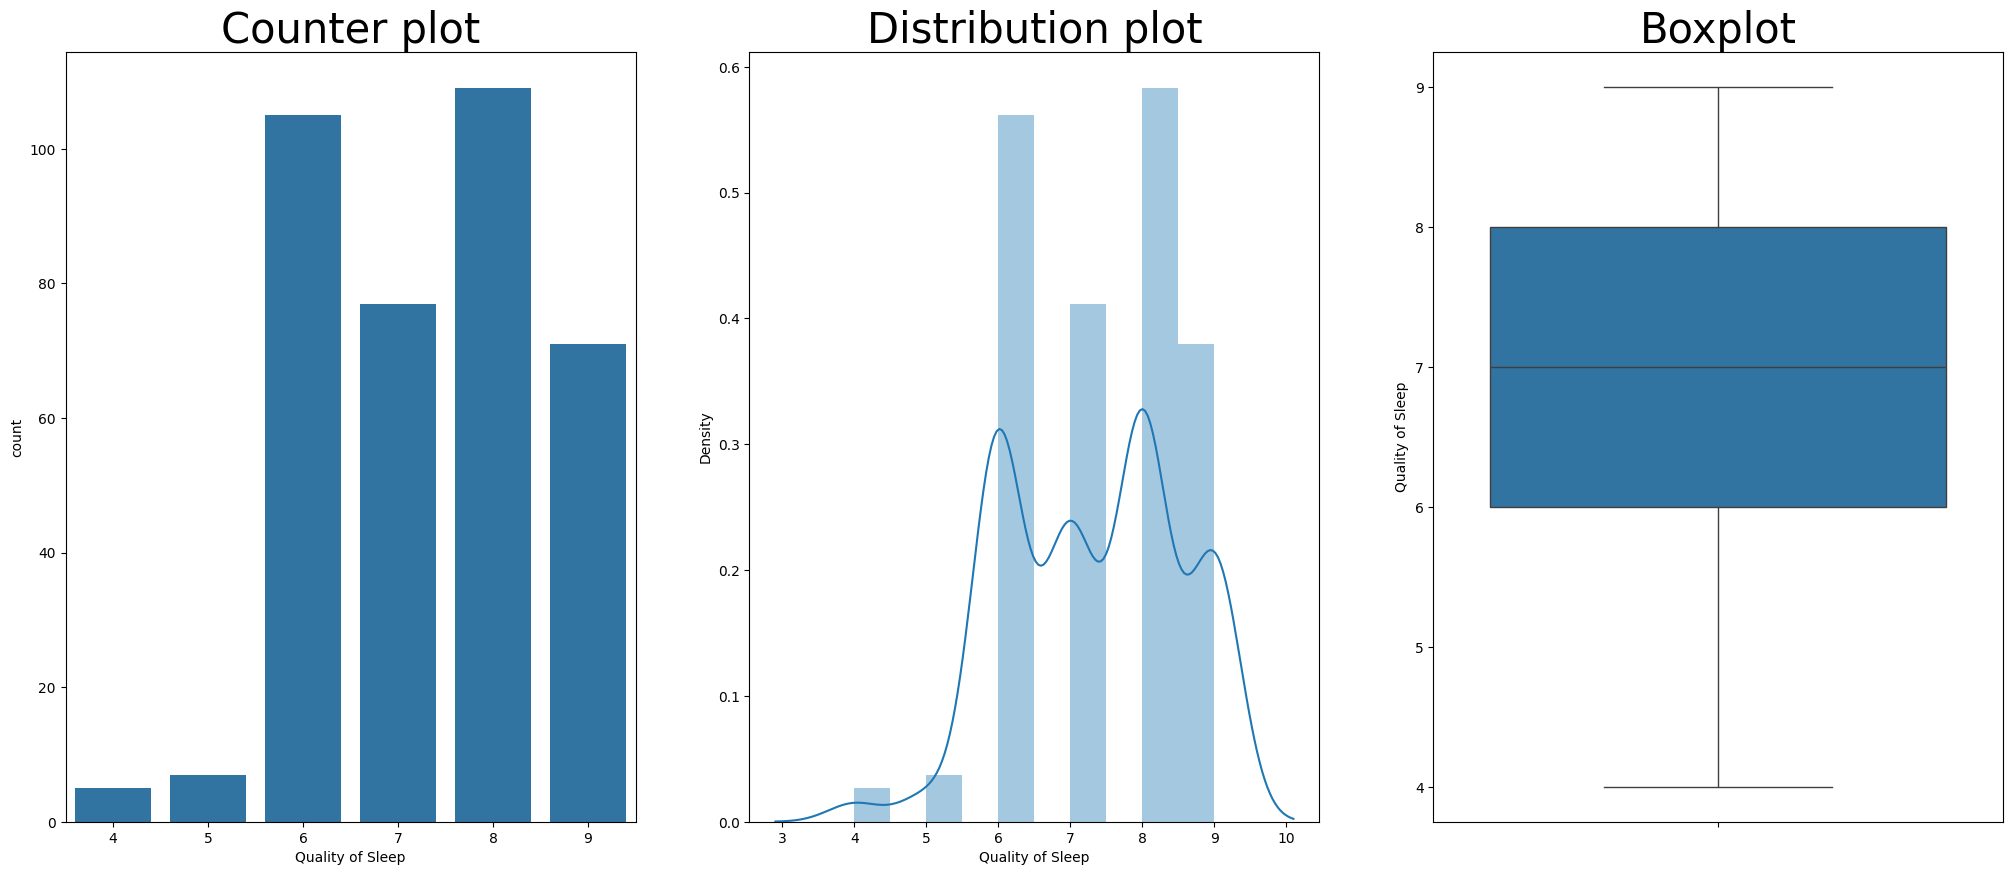

In [1177]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Quality of Sleep',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Quality of Sleep"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Quality of Sleep"])

<Axes: title={'center': 'Boxplot'}, ylabel='Sleep Duration'>

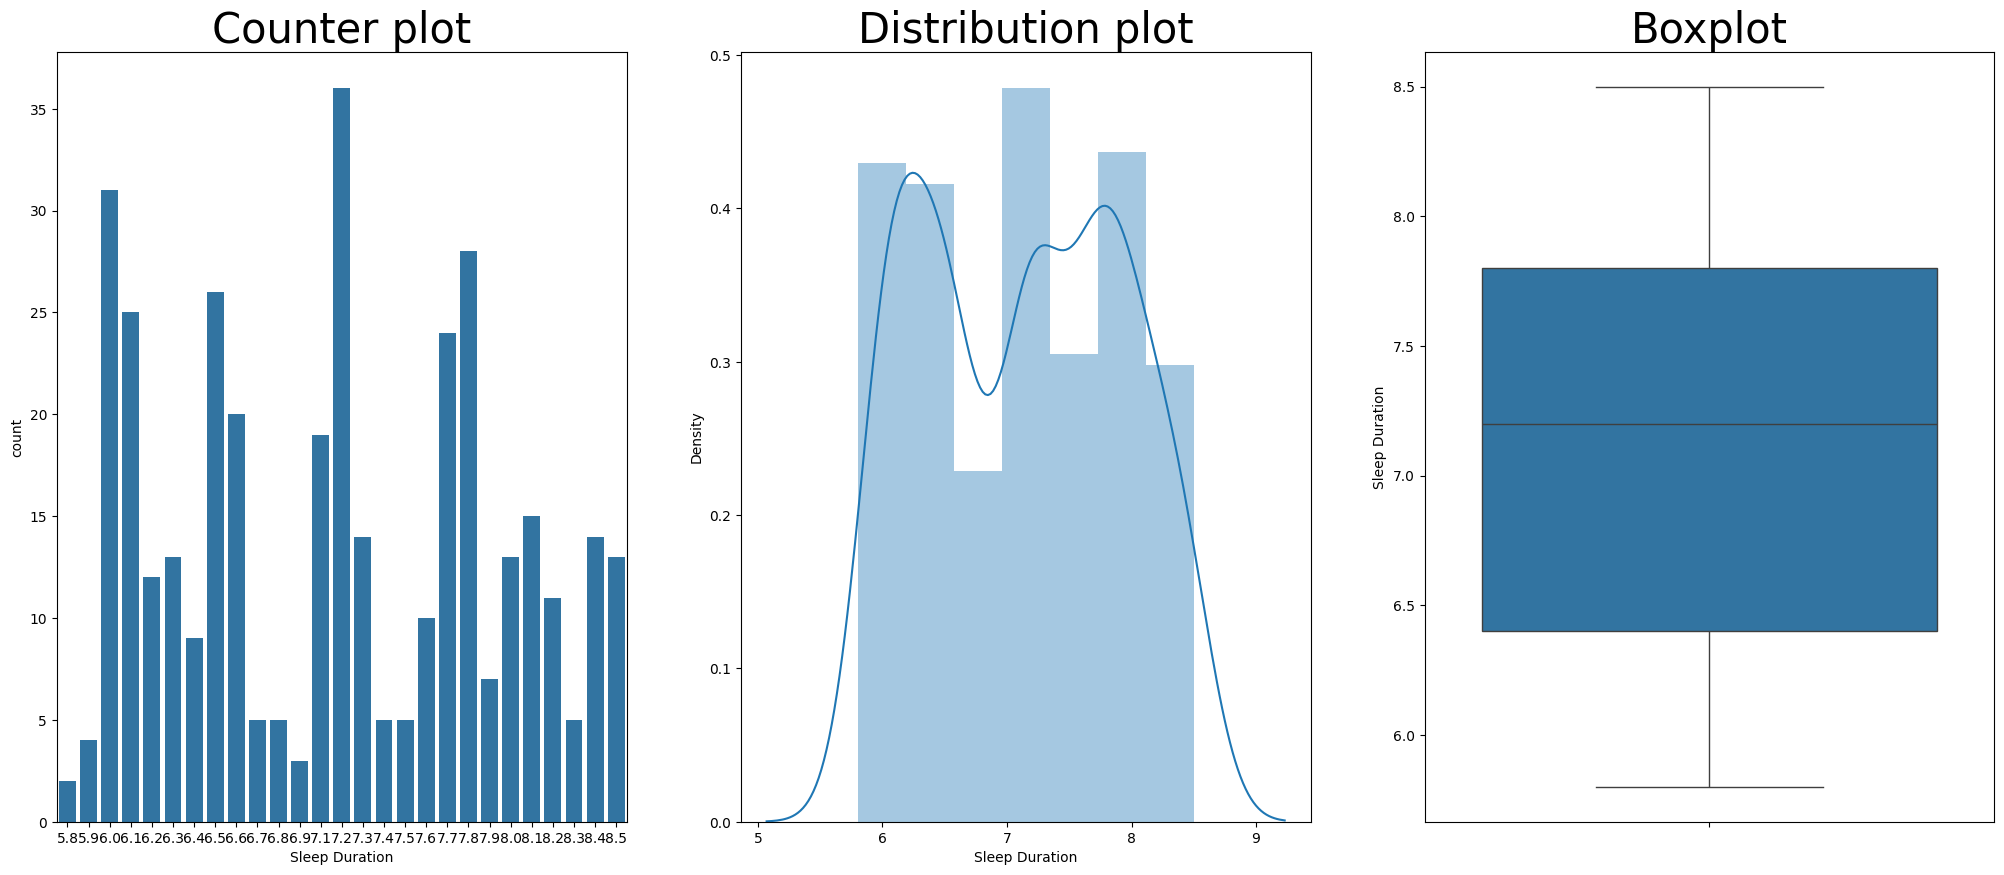

In [1178]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Sleep Duration',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Sleep Duration"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Sleep Duration"])

<Axes: title={'center': 'Boxplot'}, ylabel='Physical Activity Level'>

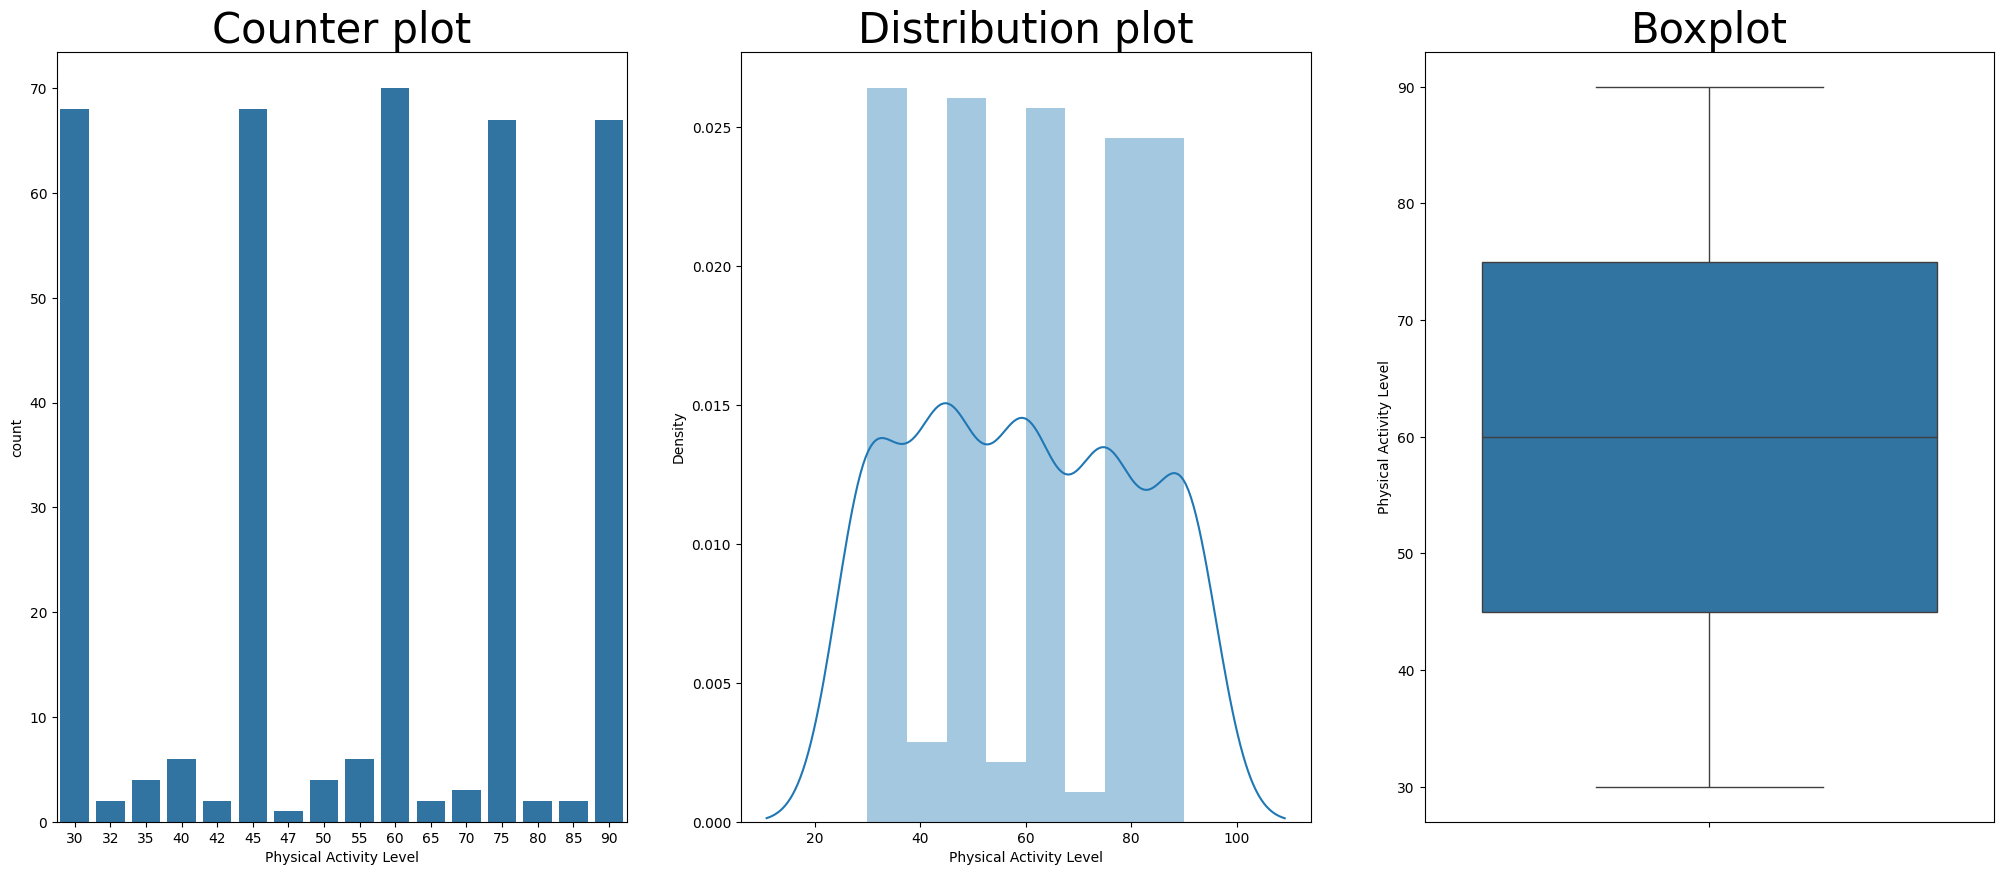

In [1179]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Physical Activity Level',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Physical Activity Level"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Physical Activity Level"])

<Axes: title={'center': 'Boxplot'}, ylabel='Heart Rate'>

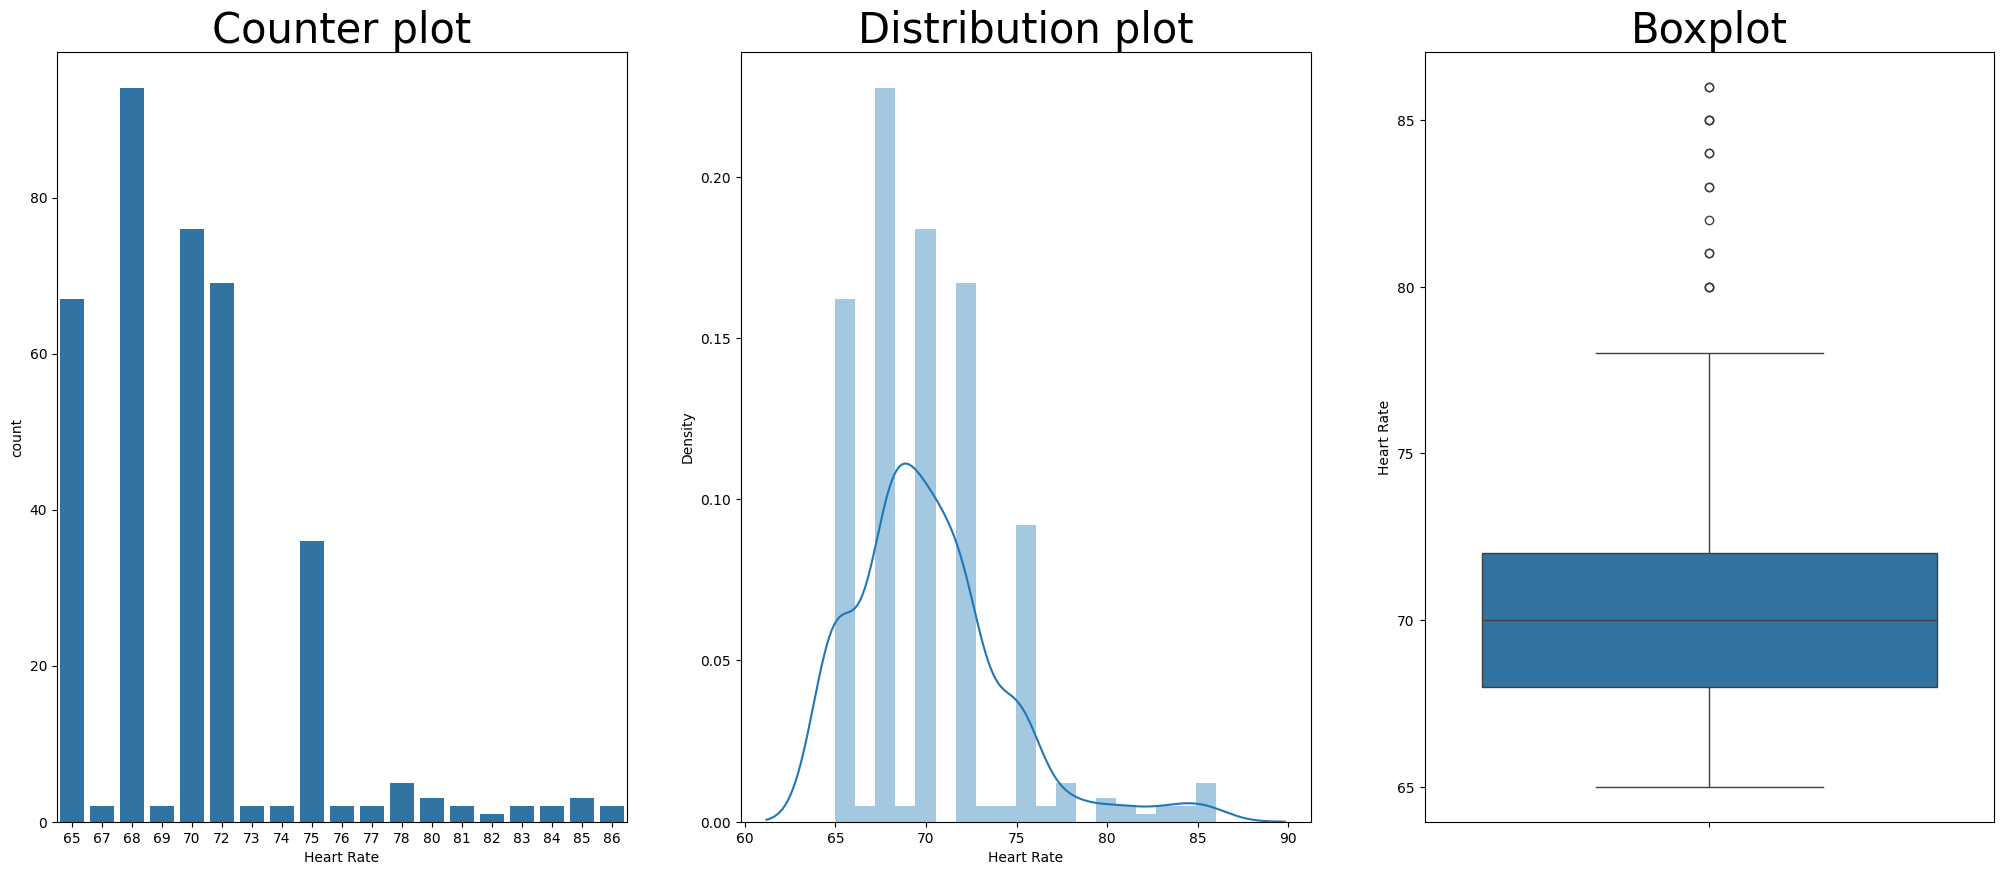

In [1180]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Heart Rate',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Heart Rate"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Heart Rate"])
#Heart rate has outliers

<Axes: title={'center': 'Boxplot'}, ylabel='Daily Steps'>

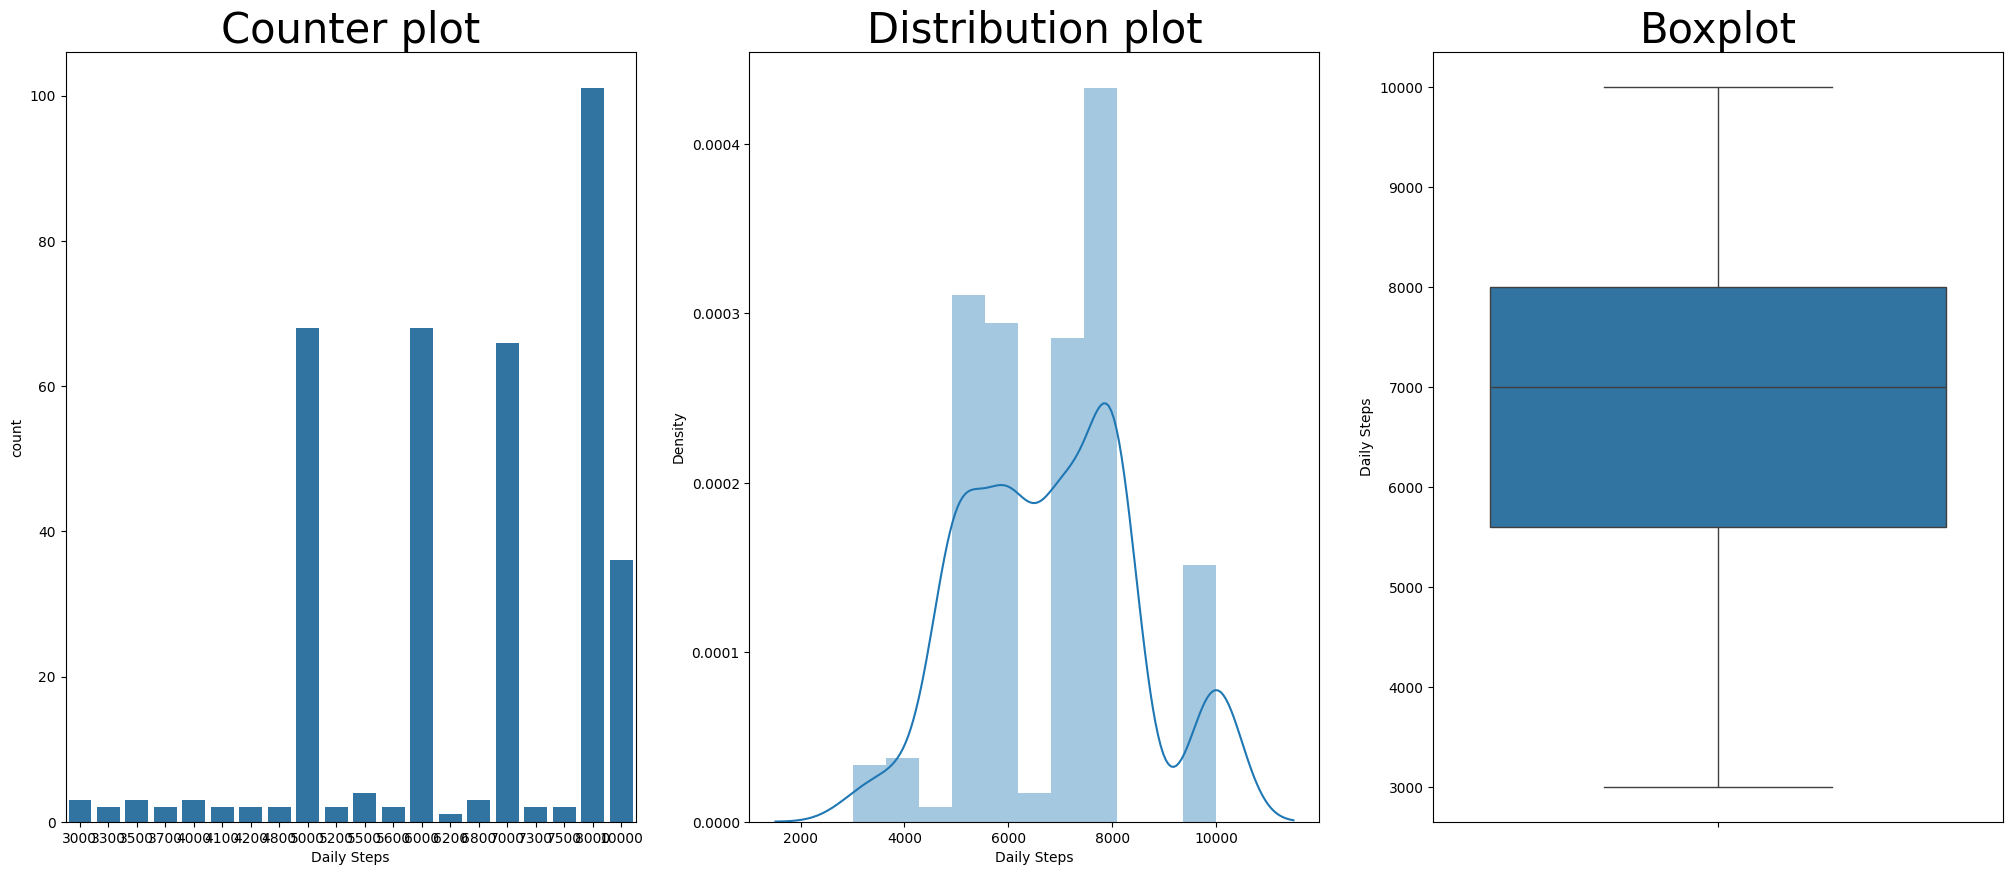

In [1181]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Daily Steps',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Daily Steps"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Daily Steps"])

Quality of Sleep

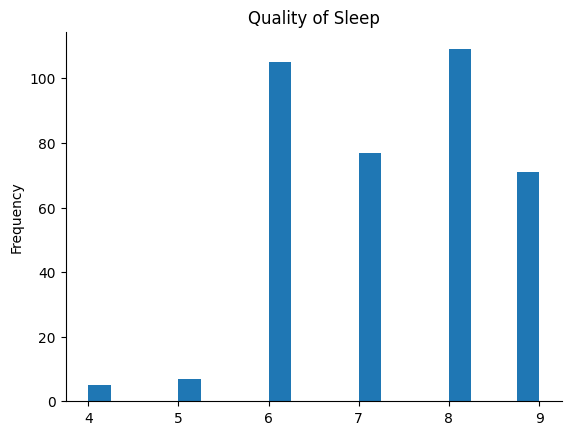

In [1182]:
# Quality of Sleep

from matplotlib import pyplot as plt
df['Quality of Sleep'].plot(kind='hist', bins=20, title='Quality of Sleep')
plt.gca().spines[['top', 'right',]].set_visible(False)

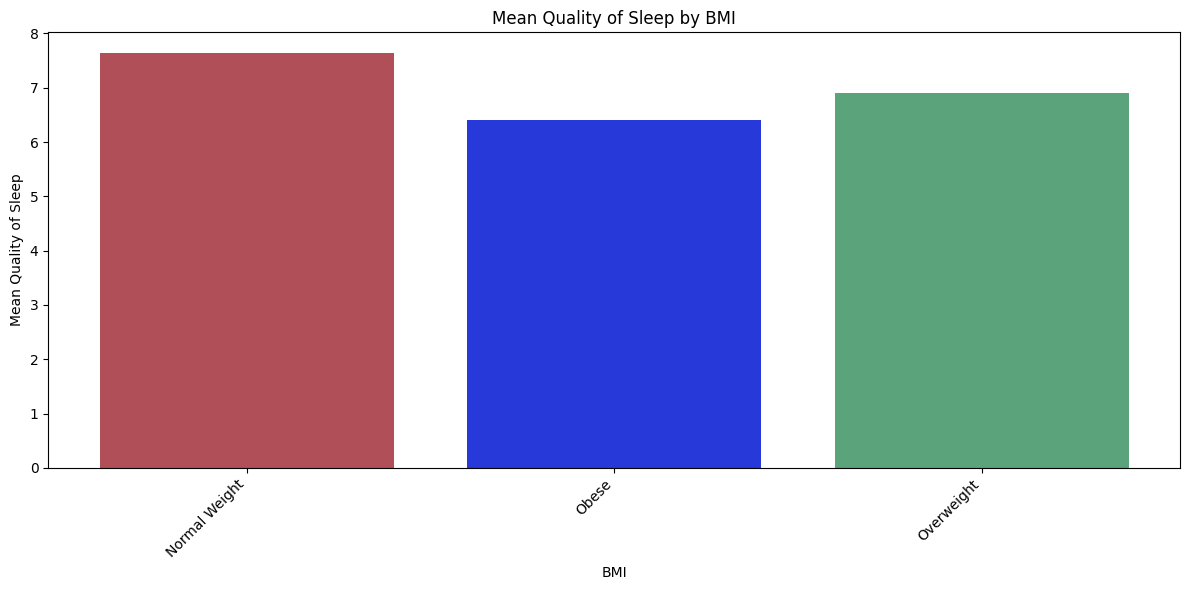

In [1183]:
mean_quality_bmi = df.groupby('BMI Category')['Quality of Sleep'].mean()
categories = mean_quality_bmi.index
values = mean_quality_bmi.values
colors = ["#b04f58", "#2739d8", "#5ba47b"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("BMI")
plt.title("Mean Quality of Sleep by BMI")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

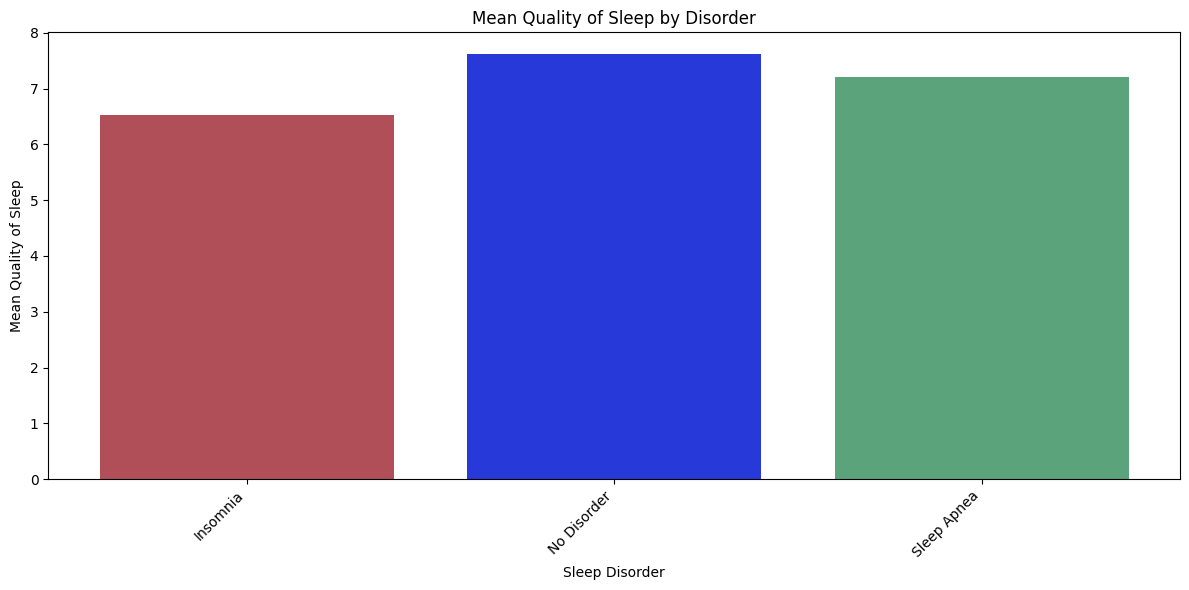

In [1184]:
mean_quality_sleep_disorder = df.groupby('Sleep Disorder')['Quality of Sleep'].mean()
categories = mean_quality_sleep_disorder.index
values = mean_quality_sleep_disorder.values
colors = ["#b04f58", "#2739d8", "#5ba47b"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Sleep Disorder")
plt.title("Mean Quality of Sleep by Disorder")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

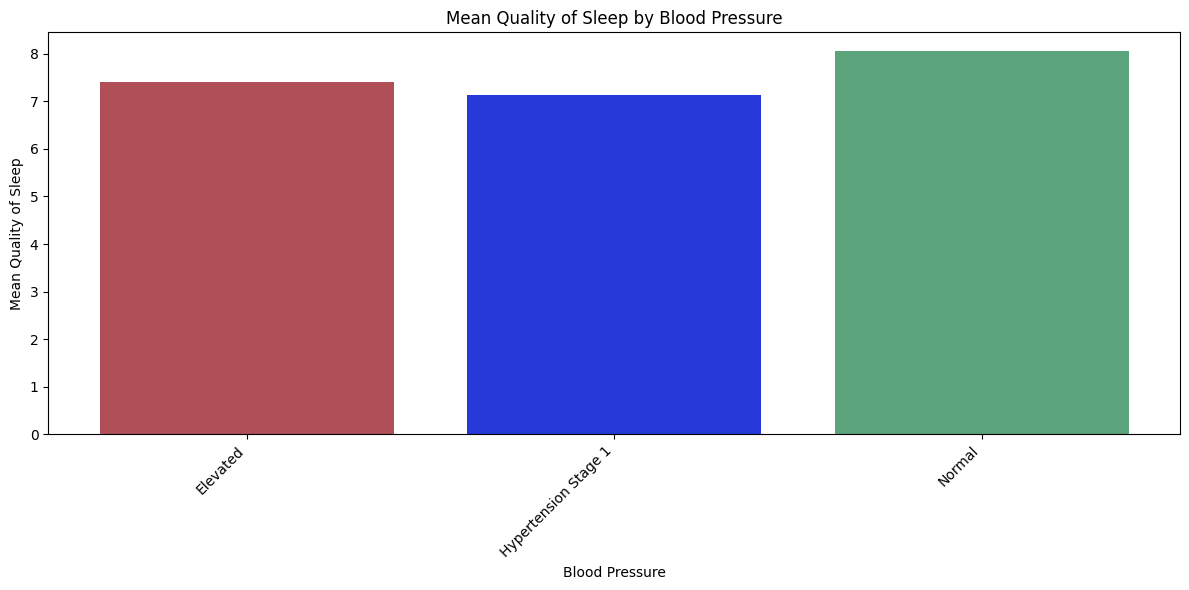

In [1185]:
mean_quality_blood_pressure = df.groupby('Blood Pressure Status')['Quality of Sleep'].mean()
categories = mean_quality_blood_pressure.index
values = mean_quality_blood_pressure.values
colors = ["#b04f58", "#2739d8", "#5ba47b"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Blood Pressure")
plt.title("Mean Quality of Sleep by Blood Pressure")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

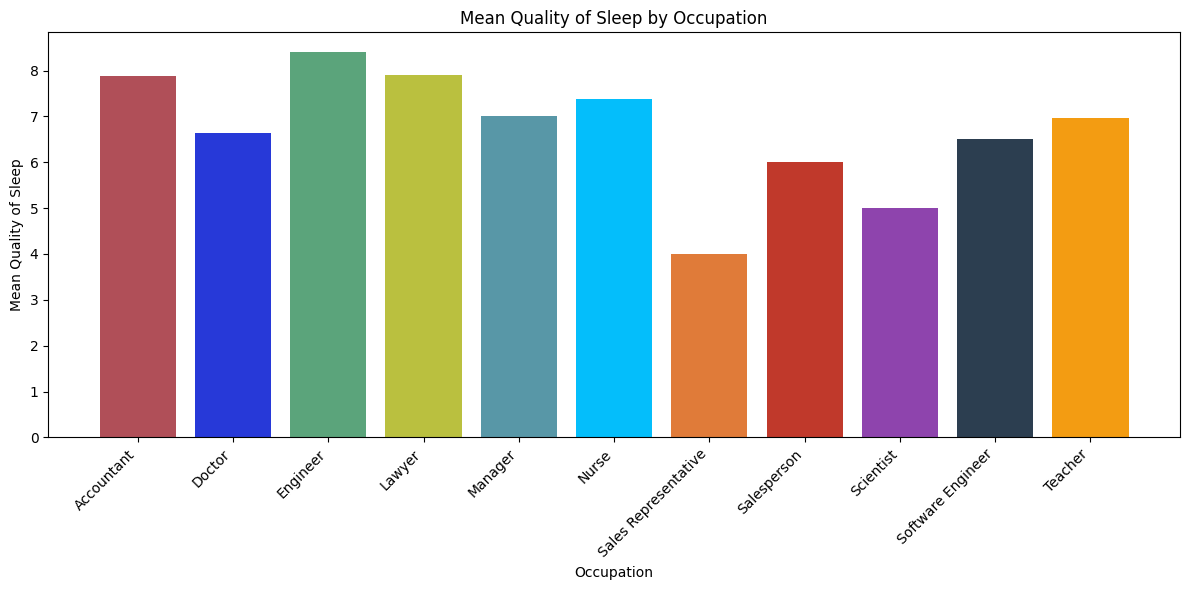

In [1186]:
mean_quality_by_occupation = df.groupby('Occupation')['Quality of Sleep'].mean()
categories = mean_quality_by_occupation.index
values = mean_quality_by_occupation.values
colors = ["#b04f58", "#2739d8", "#5ba47b", "#bac03f", "#5897a7", "#04befb", "#e07b39", "#c0392b", "#8e44ad", "#2c3e50", "#f39c12"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Occupation")
plt.title("Mean Quality of Sleep by Occupation")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

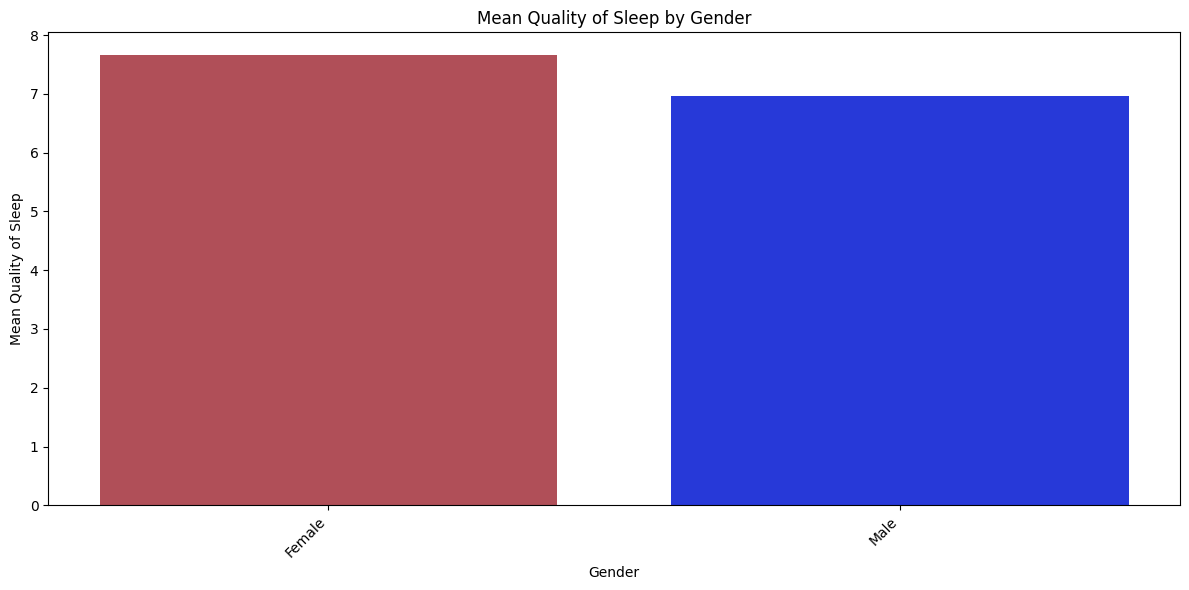

In [1187]:
mean_quality_by_gender = df.groupby('Gender')['Quality of Sleep'].mean()
categories = mean_quality_by_gender.index
values = mean_quality_by_gender.values
colors = ["#b04f58", "#2739d8"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Gender")
plt.title("Mean Quality of Sleep by Gender")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Sleep Disorder

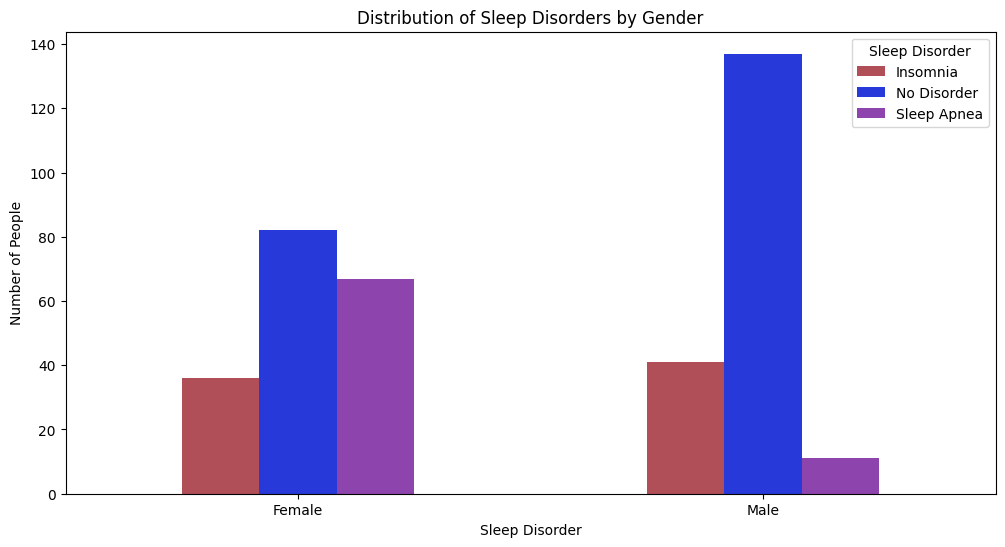

In [1188]:
disorder_gender=df.groupby('Gender')['Sleep Disorder'].value_counts()

disorder_gender_unstacked = disorder_gender.unstack()

disorder_gender_unstacked.plot(kind='bar', figsize=(12, 6), color=["#b04f58", "#2739d8","#8e44ad"])
plt.ylabel("Number of People")
plt.xlabel("Sleep Disorder")
plt.title("Distribution of Sleep Disorders by Gender")
plt.xticks(rotation=0)
plt.show()

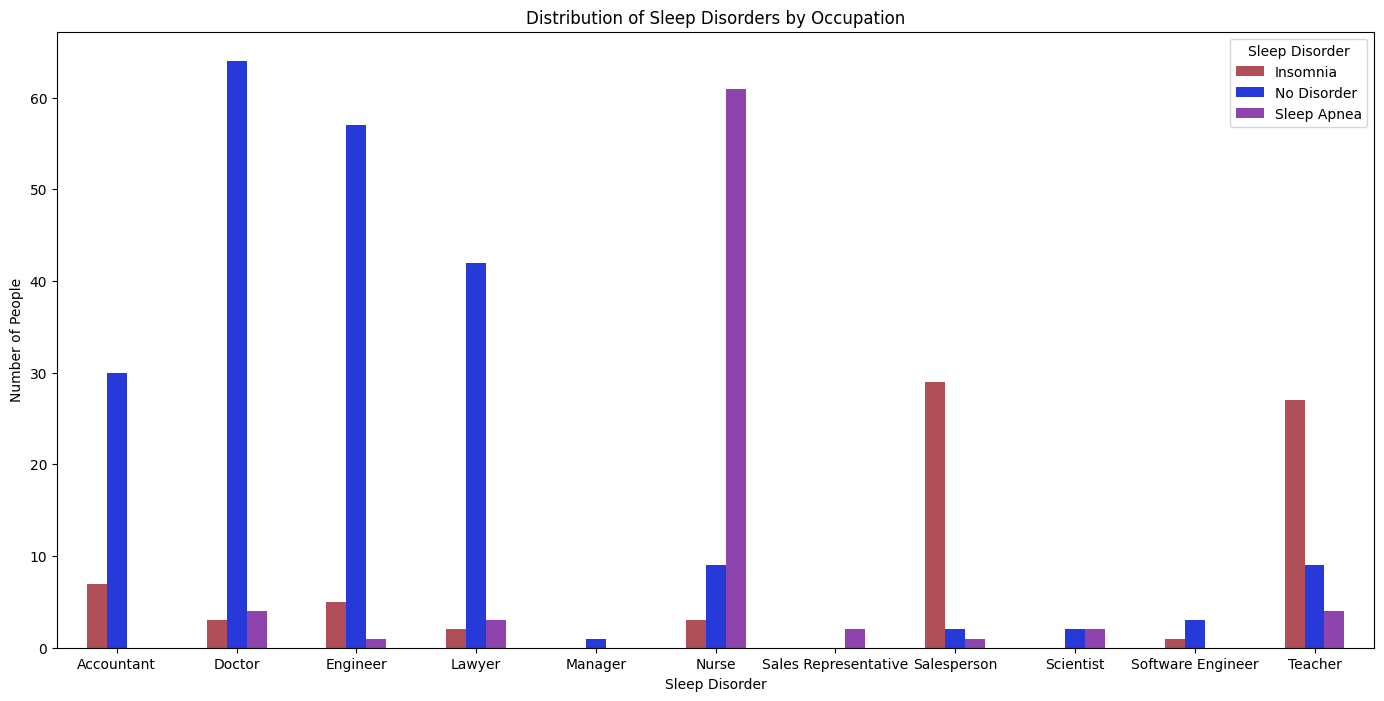

In [1189]:
disorder_occupation=df.groupby('Occupation')['Sleep Disorder'].value_counts()
disorder_occupation_unstacked = disorder_occupation.unstack()

disorder_occupation_unstacked.plot(kind='bar', figsize=(17, 8), color=["#b04f58", "#2739d8","#8e44ad"])
plt.ylabel("Number of People")
plt.xlabel("Sleep Disorder")
plt.title("Distribution of Sleep Disorders by Occupation")
plt.xticks(rotation=0)
plt.show()

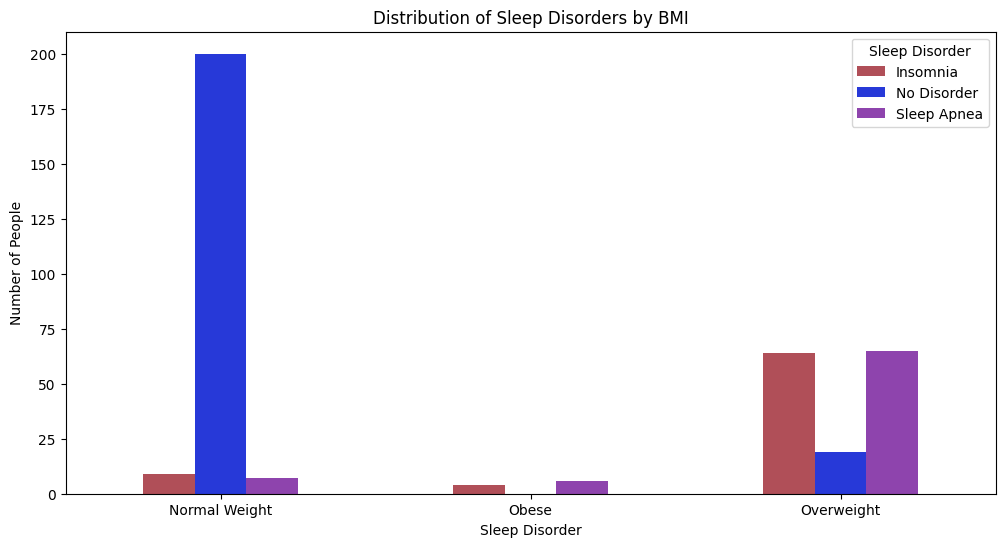

In [1190]:
disorder_gender=df.groupby('BMI Category')['Sleep Disorder'].value_counts()

disorder_gender_unstacked = disorder_gender.unstack()

disorder_gender_unstacked.plot(kind='bar', figsize=(12, 6), color=["#b04f58", "#2739d8","#8e44ad"])
plt.ylabel("Number of People")
plt.xlabel("Sleep Disorder")
plt.title("Distribution of Sleep Disorders by BMI")
plt.xticks(rotation=0)
plt.show()

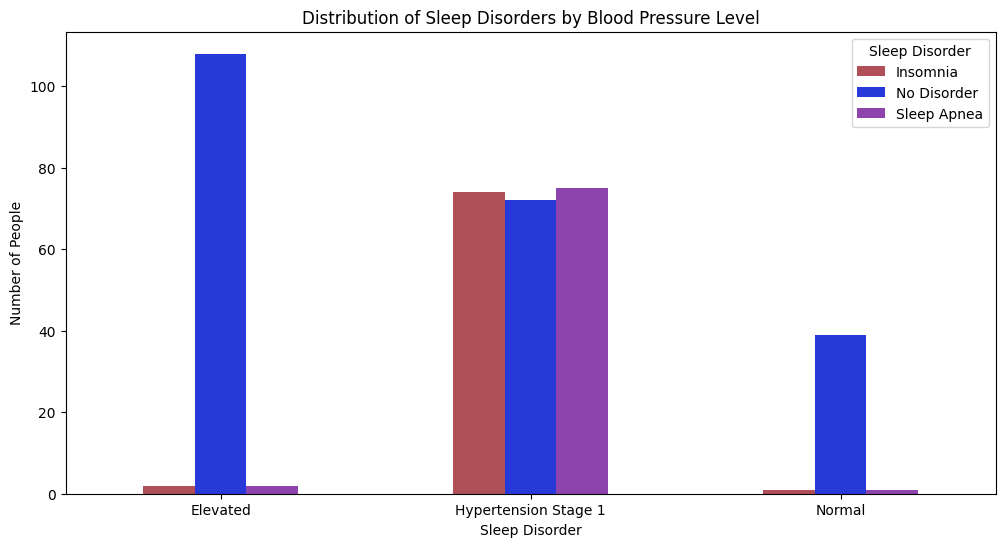

In [1191]:
disorder_gender=df.groupby('Blood Pressure Status')['Sleep Disorder'].value_counts()

disorder_gender_unstacked = disorder_gender.unstack()

disorder_gender_unstacked.plot(kind='bar', figsize=(12, 6), color=["#b04f58", "#2739d8","#8e44ad"])
plt.ylabel("Number of People")
plt.xlabel("Sleep Disorder")
plt.title("Distribution of Sleep Disorders by Blood Pressure Level")
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Mean Quality of Sleep by Disorder')

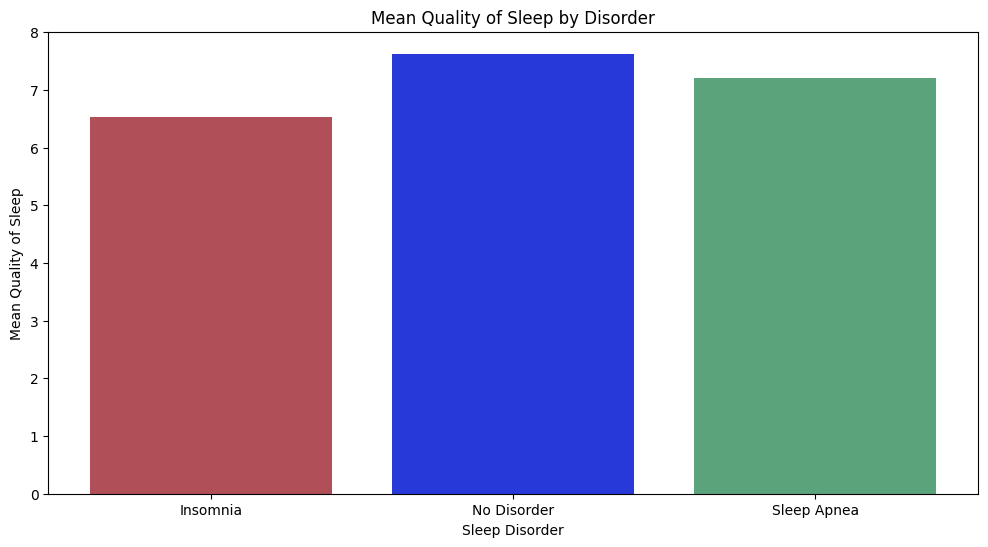

In [1192]:
mean_quality_sleep_disorders = df.groupby('Sleep Disorder')['Quality of Sleep'].mean()
categories = mean_quality_sleep_disorders.index
values = mean_quality_sleep_disorders.values
colors = ["#b04f58", "#2739d8", "#5ba47b"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Sleep Disorder")
plt.title("Mean Quality of Sleep by Disorder")

Relationships

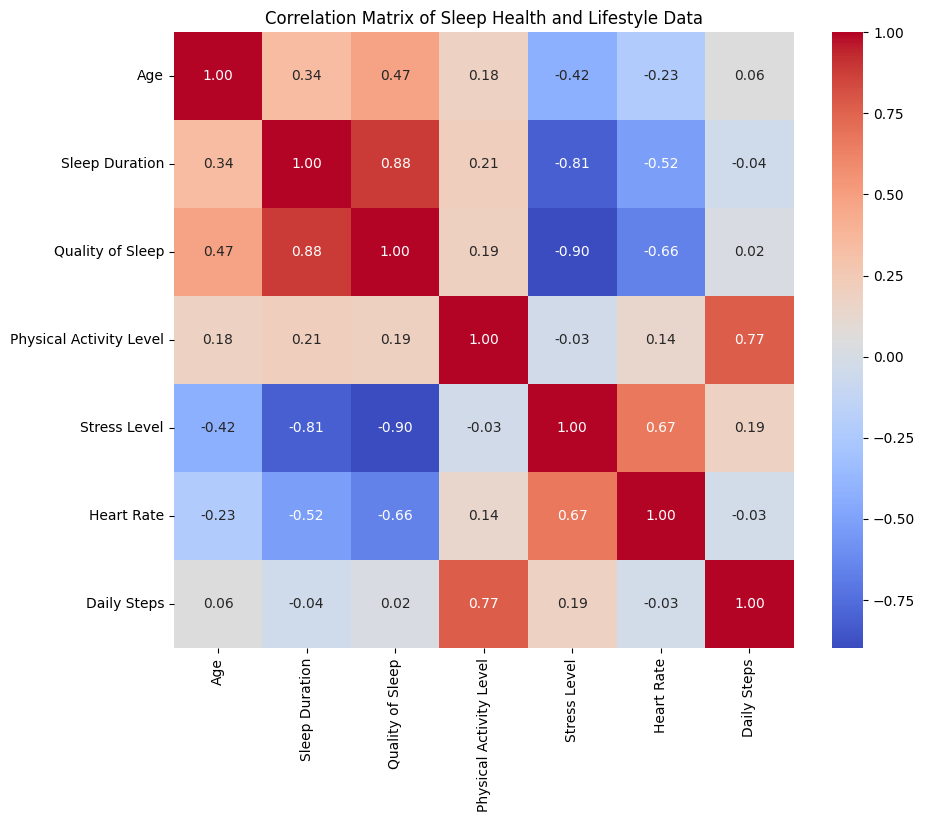

In [1193]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sleep Health and Lifestyle Data')
plt.show()

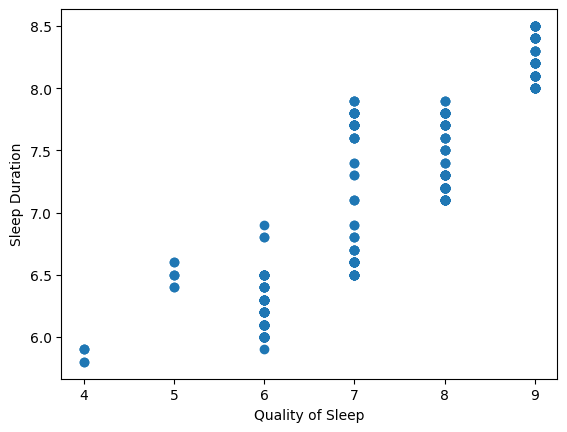

In [1194]:
x=df["Quality of Sleep"]
y=df["Sleep Duration"]
plt.scatter(x,y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.show()

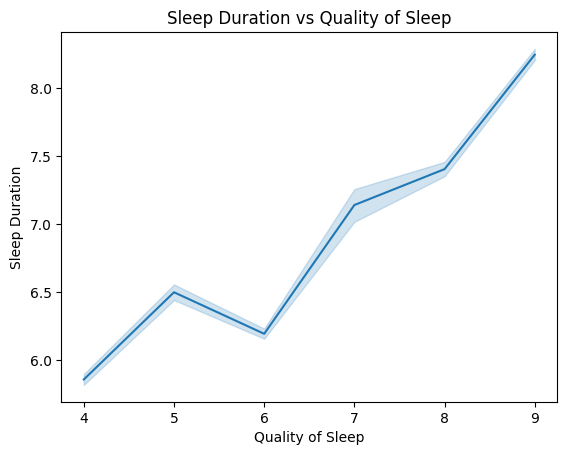

In [1195]:
sns.lineplot(data=df, x=df['Quality of Sleep'], y=df['Sleep Duration'])
plt.xlabel("Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.title("Sleep Duration vs Quality of Sleep")
plt.show()

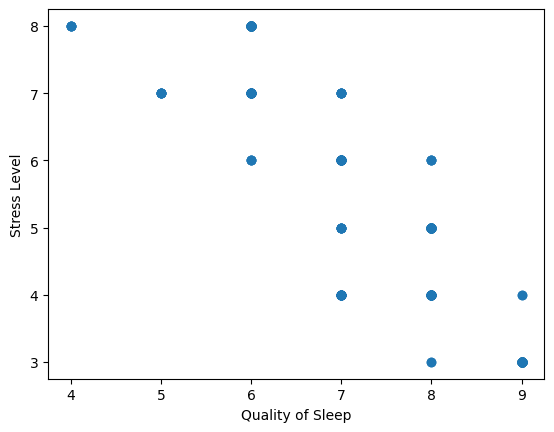

In [1196]:
x=df["Quality of Sleep"]
y=df["Stress Level"]
plt.scatter(x,y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.show()

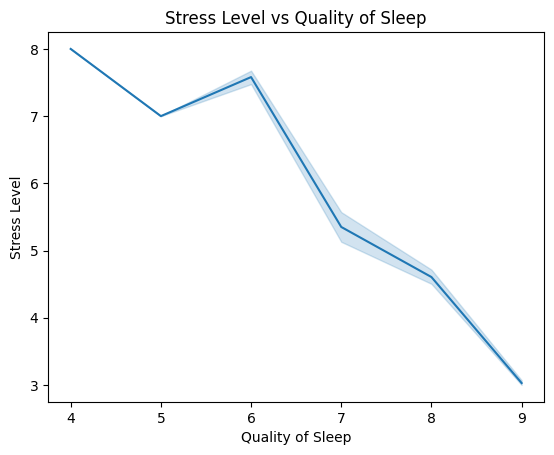

In [1197]:
sns.lineplot(data=df, x=df['Quality of Sleep'], y=df['Stress Level'])
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.title("Stress Level vs Quality of Sleep")
plt.show()

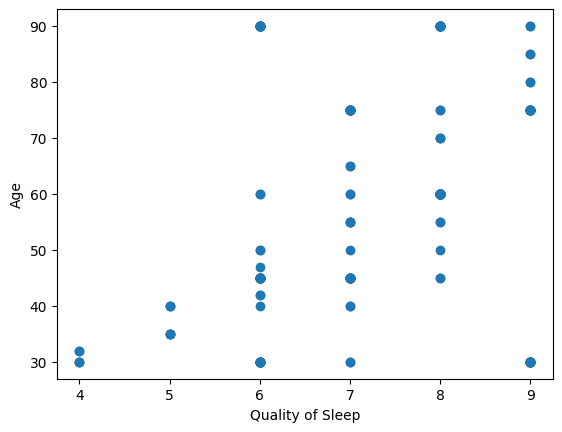

In [1198]:
x=df['Quality of Sleep']
y=df['Physical Activity Level']
plt.scatter(x,y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Age")
plt.show()

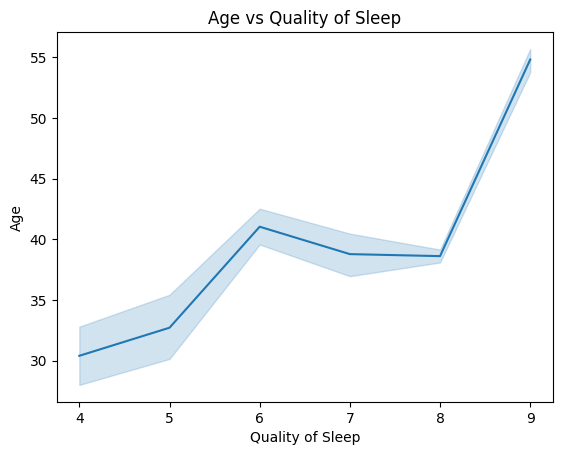

In [1199]:
sns.lineplot(data=df, x=df['Quality of Sleep'], y=df['Age'])
plt.xlabel("Quality of Sleep")
plt.ylabel("Age")
plt.title("Age vs Quality of Sleep")
plt.show()

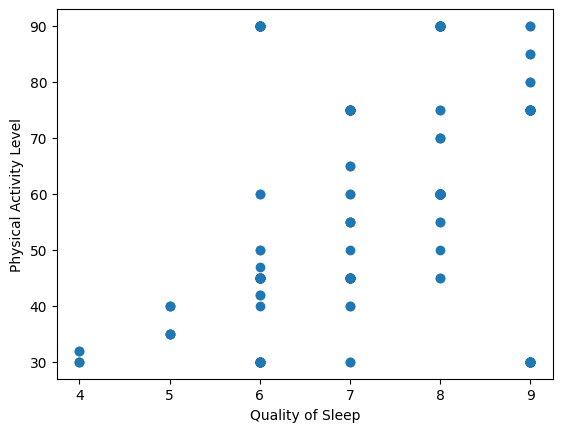

In [1200]:
x=df['Quality of Sleep']
y=df['Physical Activity Level']
plt.scatter(x,y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Physical Activity Level")
plt.show()

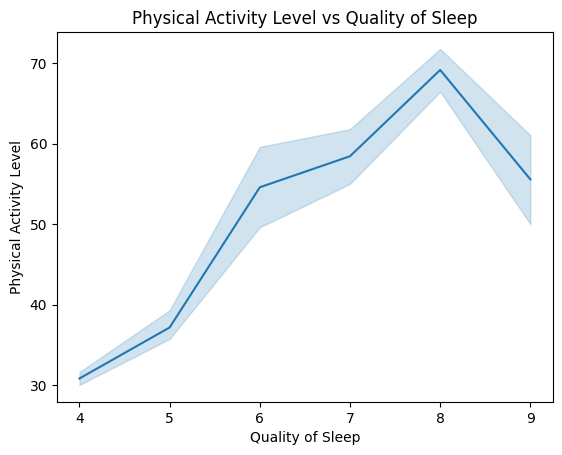

In [1201]:
sns.lineplot(data=df, x=df['Quality of Sleep'], y=df['Physical Activity Level'])
plt.xlabel("Quality of Sleep")
plt.ylabel("Physical Activity Level")
plt.title("Physical Activity Level vs Quality of Sleep")
plt.show()

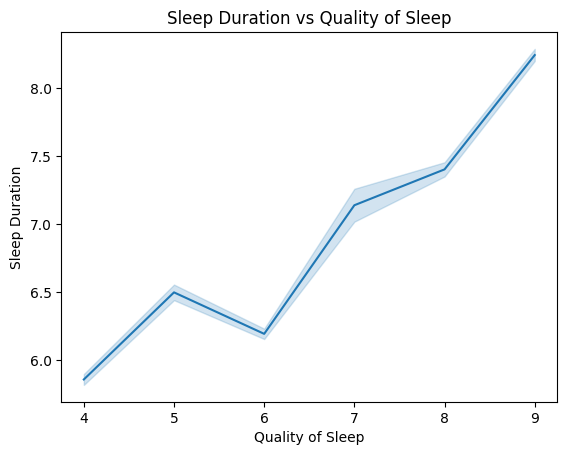

In [1202]:
sns.lineplot(data=df, x=df['Quality of Sleep'], y=df['Sleep Duration'])
plt.xlabel("Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.title("Sleep Duration vs Quality of Sleep")
plt.show()

Handling Outliers

In [1203]:
def handle_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            low_b = q1 - 1.5 * iqr
            high_b = q3 + 1.5 * iqr

            outliers = (data[column] < low_b) | (data[column] > high_b)

            if outliers.any():
                print(f"{column}: has outliers")
                data[column] = np.where(data[column] < low_b, low_b,
                                    np.where(data[column] > high_b, high_b, data[column]))
            else:
                print(f"{column}: no outliers")

    return data

num_col = df.select_dtypes(include='number').columns
df = handle_outliers(df, num_col)

Age: no outliers
Sleep Duration: no outliers
Quality of Sleep: no outliers
Physical Activity Level: no outliers
Stress Level: no outliers
Heart Rate: has outliers
Daily Steps: no outliers


Model Building

Encoding

In [1204]:
from sklearn import preprocessing

for col in df.select_dtypes(include=object).columns:
    #label encoder
    label_encoder = preprocessing.LabelEncoder()

    #FIT ENCODER
    label_encoder.fit(df[col].unique())

    #transofrm the column using encoder
    df[col] = label_encoder.transform(df[col])

    print(f'{col}: {df[col].unique()}')

Gender: [1 0]
Occupation: [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category: [2 0 1]
Sleep Disorder: [1 2 0]
Blood Pressure Status: [1 0 2]


In [1205]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Quality of Sleep', axis=1).select_dtypes(include=np.number)
y = df['Quality of Sleep']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Scale the resampled training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

print("Data splitting, resampling, and scaling complete.")

Data splitting, resampling, and scaling complete.


In [1206]:
# X = df.drop('Quality of Sleep', axis=1).select_dtypes(include=np.number)
# y = df['Quality of Sleep']
# scale=StandardScaler()
# x_scale=scale.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

# print("Data splitting and scaling complete.")

In [1207]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.05008284391063252
R-squared: 0.9639933541670107


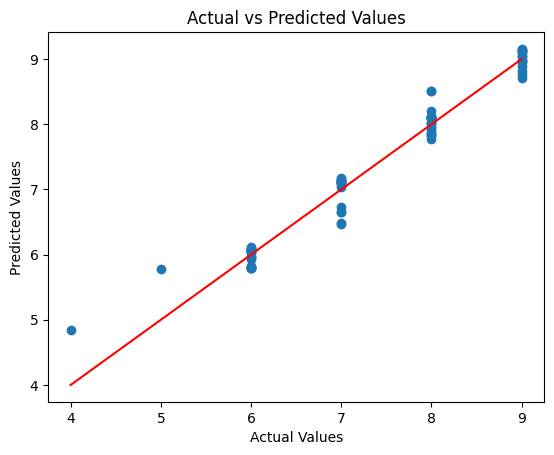

In [1208]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [1209]:
print("\nFirst 5 Actual vs Predicted values:")
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


First 5 Actual vs Predicted values:
Actual: 9, Predicted: 9.11405458459099
Actual: 6, Predicted: 6.065386855788311
Actual: 8, Predicted: 7.958711845904009
Actual: 6, Predicted: 6.06024757350184
Actual: 8, Predicted: 8.02120470270157


In [1210]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.96


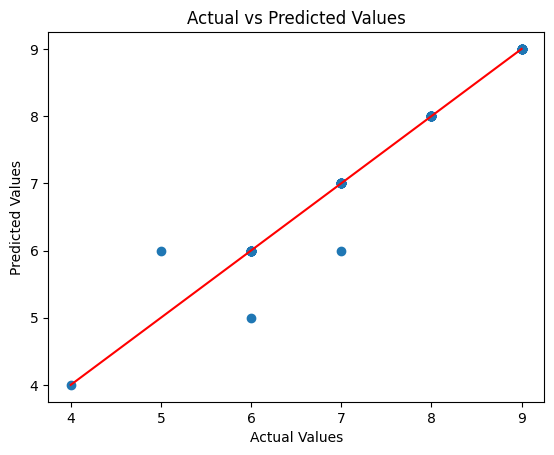

In [1211]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

Predicting Sleep Disorder

In [1212]:
df["Sleep Disorder"].value_counts()

,count
Sleep Disorder,
1,219
2,78
0,77


In [1213]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) for predicting 'Sleep Disorder'
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the resampled training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Scale the test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

print("Data splitting, resampling, and scaling complete.")

Data splitting, resampling, and scaling complete.


In [1214]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.96


In [1215]:
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Assuming 'model' is your trained model
# Save the model to a file in your Drive
with open('/content/drive/MyDrive/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1216]:
from sklearn.metrics import classification_report

# Evaluate the Random Forest model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       1.00      0.98      0.99        44
           2       0.94      0.94      0.94        16

    accuracy                           0.96        75
   macro avg       0.94      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75



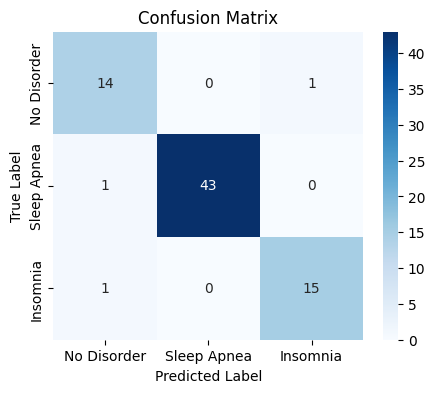

In [1217]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disorder', 'Sleep Apnea','Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [1218]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8933333333333333


In [1219]:
from sklearn.metrics import classification_report

# Evaluate the SVM model
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.95      0.93      0.94        44
           2       0.78      0.88      0.82        16

    accuracy                           0.89        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.90      0.89      0.89        75



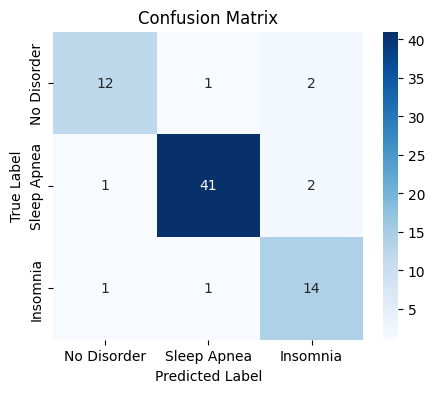

In [1220]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disorder', 'Sleep Apnea','Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [1221]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7866666666666666


In [1222]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.75      0.95      0.84        44
           2       1.00      0.31      0.48        16

    accuracy                           0.79        75
   macro avg       0.87      0.69      0.71        75
weighted avg       0.82      0.79      0.76        75



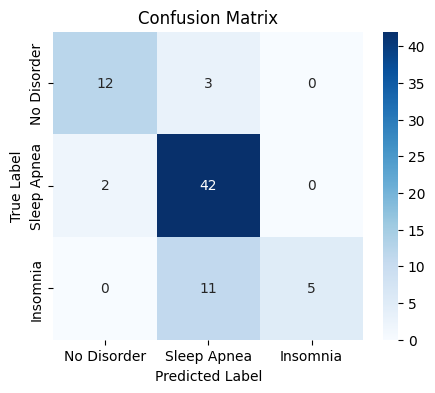

In [1223]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disorder', 'Sleep Apnea','Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

From what we can see the Random Forest is the best model

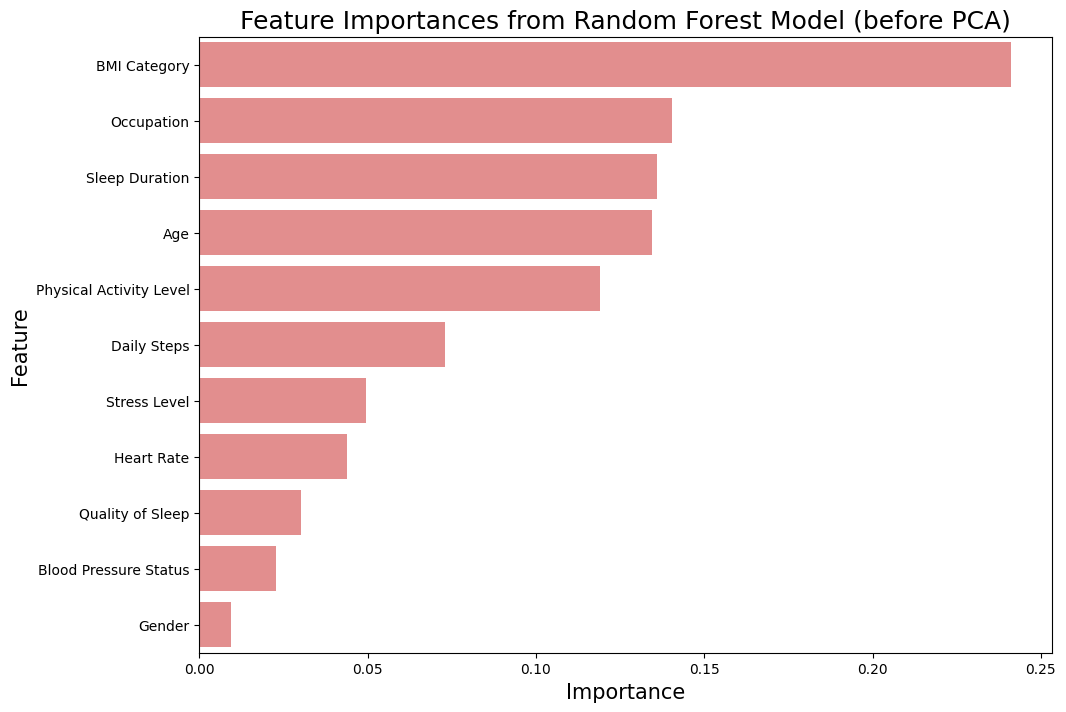

In [1224]:

# Split the original data for training the RF model
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the original data
scaler_orig = StandardScaler()
X_train_orig_scaled = scaler_orig.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_orig.transform(X_test_orig)


# Train a Random Forest model on the original scaled data
rf_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_orig.fit(X_train_orig_scaled, y_train_orig)

feature_importances = rf_orig.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(11, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, color='lightcoral')
plt.ylabel('Feature',fontsize=15)
plt.xlabel('Importance',fontsize=15)
plt.title('Feature Importances from Random Forest Model (before PCA)',fontsize=18)
plt.show()